Implémentation d'un système de recommandation pour notre application GPE.

Simuler des parents avec un ensemble de besoins pondérés.
1) Définir les catégories
2) Créer un dictionnaire des besoins éducatifs possibles des élèves
3) Créer le jeu de données final avec les caractéristiques suivantes :
   parent = {
        "parent_id": ___,
        "nom": ___,
        "prenom":___,
        "niveau_scolaire": ___,
        "caracteristique": ___,
        "historique_notes": ___,
        "besoins_prioritaires": ___
    }

In [1]:
import pandas as pd
import random
from faker import Faker

fake = Faker('fr_FR')  # Pour générer des noms en français

# Définition des catégories
niveaux_scolaires = ["Collège", "Lycée"]
caracteristiques = ["timidité", "difficultés d'apprentissage", "motivation"]
historique_notes = ["faible", "moyenne", "élevée"]

# Besoins éducatifs et leurs sous-catégories
besoins_educatifs = {
    "Mathématiques": ["Difficulté en algèbre", "Géométrie", "Calcul", "Statistiques", "Mathématiques avancées"],
    "Sciences": ["Biologie", "Chimie", "Physique", "Expérimentation scientifique"],
    "Littérature": ["Analyse de texte", "Compréhension de lecture", "Rédaction d'essais", "Littérature classique", "Poésie"],
    "Préparation aux examens": ["Préparation au BAC", "Préparation au Brevet", "Préparation aux concours"],
    "Compétences sociales": ["Développement de la confiance en soi", "Interaction sociale", "Orientation et conseil en carrière", "Gestion du stress", "Méthodologie et organisation", "Prise de parole en public"],
    "Support en devoirs": ["Aide générale pour les devoirs"],
    "Soutien Spécifique": ["Stratégies pour la Dyslexie", "Aide à la Dyscalculie", "Techniques de concentration", "Accompagnement des élèves en situation de handicap"],
    "Activités Parascolaires": ["Arts et Musique", "Sports", "Théâtre et expression orale", "Activités créatives (écriture, peinture)"]
}

# Fonction pour choisir aléatoirement des besoins (max 3 par parent)
def choisir_besoins(besoins_dict, max_besoins=3):
    # On prend la liste des catégories de besoins
    categories = list(besoins_dict.keys())
    nb_besoins = random.randint(1, max_besoins)
    besoins_selectionnes = random.sample(categories, nb_besoins)
    # Pour chaque catégorie, on peut également sélectionner une ou plusieurs sous-catégories
    besoins_detail = {}
    for b in besoins_selectionnes:
        sous = besoins_dict[b]
        # Sélection aléatoire d'une sous-catégorie
        besoins_detail[b] = random.choice(sous)
    return besoins_detail

# Création d'un jeu de données de 300 profils de parents
parents_data = []
for i in range(300):
    parent = {
        "parent_id": f"Parent_{i+1}",
        "nom": fake.last_name(),
        "prenom": fake.first_name(),
        "niveau_scolaire": random.choice(niveaux_scolaires),
        "caracteristique": random.choice(caracteristiques),
        "historique_notes": random.choice(historique_notes),
        "besoins_prioritaires": choisir_besoins(besoins_educatifs)
    }
    parents_data.append(parent)

# Transformation en DataFrame
df_parents = pd.DataFrame(parents_data)
#print(list(df_parents["besoins_prioritaires"][0].keys())[0])
print(df_parents.head())
df_parents.to_csv('besoins_parents.csv', index=False)

  parent_id      nom    prenom niveau_scolaire              caracteristique  \
0  Parent_1    Payet      Marc           Lycée  difficultés d'apprentissage   
1  Parent_2    Hamon    Sylvie           Lycée                     timidité   
2  Parent_3  Bonneau     Roger           Lycée  difficultés d'apprentissage   
3  Parent_4    Aubry  Théodore           Lycée                     timidité   
4  Parent_5  Poulain   Patrick           Lycée                   motivation   

  historique_notes                               besoins_prioritaires  
0           élevée       {'Sciences': 'Expérimentation scientifique'}  
1           élevée  {'Mathématiques': 'Statistiques', 'Préparation...  
2          moyenne  {'Préparation aux examens': 'Préparation aux c...  
3           élevée  {'Mathématiques': 'Calcul', 'Soutien Spécifiqu...  
4           faible  {'Mathématiques': 'Géométrie', 'Activités Para...  


Générer les Profils de Mentors Synthétiques

In [2]:
import pandas as pd
import random
from faker import Faker

fake = Faker('fr_FR')

# Définir les catégories pour les mentors
expertise = ["Mathématiques", "Sciences", "Littérature", "Coaching personnel", "Préparation aux examens", "Compétences sociales", "Support en devoirs", "Soutien Spécifique", "Activités Parascolaires"]
experience = ["Débutant", "Intermédiaire", "Avancé"]
classes = ["Collège", "Lycée"]
approches_pedagogiques = ["Interactive", "Centrée sur l'élève", "Expérientielle", "Résolution de problèmes", "Traditionnelle"]
tarif_min, tarif_max = 20, 60

# Générer les profils de mentors
def generate_mentor_profiles(n):
    mentors = []
    for i in range(n):
        mentor = {
            "ID": f"Mentor_{i+1}",
            "nom": fake.last_name(),
            "prenom": fake.first_name(),
            "Spécialité": random.choice(expertise),
            "Expérience": random.choice(experience),
            "Classe souhaitée": random.choice(classes),
            "Disponibilité (heures/semaine)": random.randint(5, 20),
            "Approche pédagogique": random.choice(approches_pedagogiques),
            "Rating": round(random.uniform(3.0, 5.0), 1),
            "Nombre d'avis": random.randint(10, 200),
            "Taux de satisfaction (%)": random.randint(60, 100),
            "Ville": fake.city(),
            "Tarif horaire (€)": random.randint(tarif_min, tarif_max),
        }
        mentors.append(mentor)
    return pd.DataFrame(mentors)

# Générer un DataFrame avec 40 mentors synthétiques
df_mentors = generate_mentor_profiles(40)
print(df_mentors.head())
df_mentors.to_csv("mentor_profiles.csv", index=False)

         ID     nom     prenom               Spécialité Expérience  \
0  Mentor_1  Michel    Gilbert  Préparation aux examens     Avancé   
1  Mentor_2  Girard       Lucy              Littérature     Avancé   
2  Mentor_3  Vallée     Marine     Compétences sociales   Débutant   
3  Mentor_4  Dumont       Alix       Support en devoirs     Avancé   
4  Mentor_5  Collet  Catherine  Activités Parascolaires   Débutant   

  Classe souhaitée  Disponibilité (heures/semaine)     Approche pédagogique  \
0          Collège                              12  Résolution de problèmes   
1          Collège                              13           Traditionnelle   
2            Lycée                              11           Traditionnelle   
3          Collège                              16  Résolution de problèmes   
4          Collège                               9  Résolution de problèmes   

   Rating  Nombre d'avis  Taux de satisfaction (%)                 Ville  \
0     4.2             65    

Association des mentors aux parents : L'objectif ici est de trouver les mentors qui répondent le mieux aux besoins des parents pour les élèves en fonction de critères logiques ou probabilistiques.

In [3]:
# Fonction pour trouver des mentors correspondant aux besoins des parents
def match_students_to_mentors(student, mentors):
    # Extraire la première clé du dictionnaire des besoins prioritaires
    besoin_key = list(student["besoins_prioritaires"].keys())[0]
    
    # Filtrer les mentors par besoin principal du parent
    matching_mentors = df_mentors[df_mentors["Spécialité"] == besoin_key]
    # Affiner le match sur le niveau d'enseignement préféré
    matching_mentors = matching_mentors[matching_mentors["Classe souhaitée"] == student["niveau_scolaire"]]
    
    return matching_mentors

# Exemple de correspondance pour un élève spécifique
sample_student = df_parents.iloc[0]
#print(sample_student)
matched_mentors = match_students_to_mentors(sample_student, df_mentors)
print(f"Élève: {sample_student.to_dict()}")
print("Mentors correspondants :")
print(matched_mentors)


Élève: {'parent_id': 'Parent_1', 'nom': 'Payet', 'prenom': 'Marc', 'niveau_scolaire': 'Lycée', 'caracteristique': "difficultés d'apprentissage", 'historique_notes': 'élevée', 'besoins_prioritaires': {'Sciences': 'Expérimentation scientifique'}}
Mentors correspondants :
           ID      nom prenom Spécialité     Expérience Classe souhaitée  \
24  Mentor_25  Humbert    Guy   Sciences  Intermédiaire            Lycée   

    Disponibilité (heures/semaine)     Approche pédagogique  Rating  \
24                              19  Résolution de problèmes     4.6   

    Nombre d'avis  Taux de satisfaction (%)    Ville  Tarif horaire (€)  
24             87                        67  Lefèvre                 49  


Génération des Interactions (évaluation des parents aux mentors)

In [4]:
# Générer des interactions entre parents et mentors
interactions = []
for parent in df_parents['parent_id']:
    for _ in range(random.randint(5, 10)):  # Chaque parent interagit avec 5 à 10 mentors
        interaction = {
            "parent_id": parent,
            "mentor_id": random.choice(df_mentors['ID']),
            "rating": random.choice(df_mentors['Rating']),  # Notes de 1 à 5
        }
        interactions.append(interaction)

interactions_df = pd.DataFrame(interactions)
print(interactions_df.head())

# Créer la matrice utilisateur-élément représentant les interactions simulées entre parents et mentors.
user_item_matrix = interactions_df.pivot_table(index="parent_id", columns="mentor_id", values="rating")
# Imputation basée sur la moyenne
user_item_matrix = user_item_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

user_item_matrix.to_csv("Parent_Mentor_Matrix.csv", index=True)

# Vérifier les mentors les mieux notés
#top_mentors = interactions_df.groupby("mentor_id")["rating"].mean().sort_values(ascending=False)
#print(top_mentors.head())


  parent_id  mentor_id  rating
0  Parent_1  Mentor_39     4.1
1  Parent_1  Mentor_20     4.6
2  Parent_1  Mentor_32     3.3
3  Parent_1  Mentor_25     4.0
4  Parent_1   Mentor_3     3.2


In [5]:
print(interactions_df.shape)

(2267, 3)


Visualisation la distribution pour évaluer la variété des données simulées.

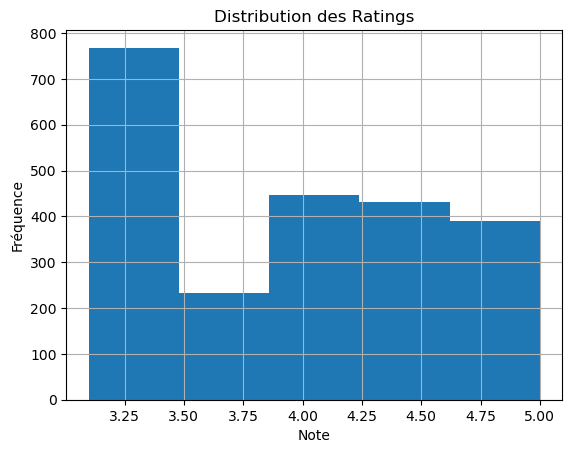

In [6]:
import matplotlib.pyplot as plt

# Distribution des évaluations
interactions_df['rating'].hist(bins=5)
plt.title("Distribution des Ratings")
plt.xlabel("Note")
plt.ylabel("Fréquence")
plt.show()


Je vais implémenter les deux algorithmes suivants et les comprarer par la suite pour voir lequel serait plus optimal pour ma problématique
    

--> Memory-based ==> Filtrage Collaboratif par kNN

--> Model-based ==> Factorisation Matricielle (SVD)

In [7]:
from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
import numpy as np

# Préparer le dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(interactions_df[['parent_id', 'mentor_id', 'rating']], reader)

# Train/test split
trainset, testset = train_test_split(data, test_size=0.2)

# 1- Filtrage Collaboratif par kNN [KNN item-based]
sim_options = {
    'name': 'cosine',
    'user_based': False  # False pour item-based
}

knn = KNNBasic(sim_options=sim_options)
knn.fit(trainset)
knn_preds = knn.test(testset)

# 2- CF par Factorisation Matricielle (SVD)
svd = SVD()
svd.fit(trainset)
svd_preds = svd.test(testset)

# Comparaison des précisions
print("kNN RMSE:")
accuracy.rmse(knn_preds)

print("SVD RMSE:")
accuracy.rmse(svd_preds)

print("Comparaison des deux models....")
# Évaluation du modèle knn
results_knn = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
rmse_knn = results_knn['test_rmse']
mae_knn = results_knn['test_mae']

# Évaluation du modèle svd
results_svd = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
rmse_svd = results_svd['test_rmse']
mae_svd = results_svd['test_mae']

mean_rmse_knn = np.mean(rmse_knn)
mean_mae_knn = np.mean(mae_knn)

mean_rmse_svd = np.mean(rmse_svd)
mean_mae_svd = np.mean(mae_svd)

Computing the cosine similarity matrix...
Done computing similarity matrix.
kNN RMSE:
RMSE: 0.6621
SVD RMSE:
RMSE: 0.6258
Comparaison des deux models....
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6525  0.6639  0.6671  0.6756  0.6653  0.6649  0.0074  
MAE (testset)     0.5657  0.5706  0.5644  0.5746  0.5788  0.5708  0.0054  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Evaluating RMSE, MAE of algorith

Analyse Comparative : 


kNN vs SVD

Pour évaluer l'efficacité des deux algorithmes de recommandation implémentés, à savoir kNN (item-based) et SVD (factorisation matricielle), j'ai mesuré les performances sur un jeu de données simulé à l’aide de deux métriques classiques : RMSE (Root Mean Squared Error) et MAE (Mean Absolute Error), avec une validation croisée à 5 plis.


In [8]:
# Création d'un DataFrame comparatif
df_results = pd.DataFrame({
    'Model': ['KNN', 'SVD'],
    'Mean RMSE': [mean_rmse_knn, mean_rmse_svd],
    'Mean MAE': [mean_mae_knn, mean_mae_svd]
})

print(df_results)

  Model  Mean RMSE  Mean MAE
0   KNN   0.664891  0.570837
1   SVD   0.626928  0.546492


Les résultats montrent que le modèle SVD surpasse légèrement le modèle kNN en termes de précision. Cela s’explique par la capacité de la factorisation matricielle à capter des patterns latents dans les interactions, même lorsque la matrice utilisateur-mentor est relativement creuse.

Par ailleurs, SVD présente également une stabilité plus forte (écart-type plus faible), ce qui en fait un candidat plus robuste dans le cas de nouvelles données ou d'élargissement du dataset.

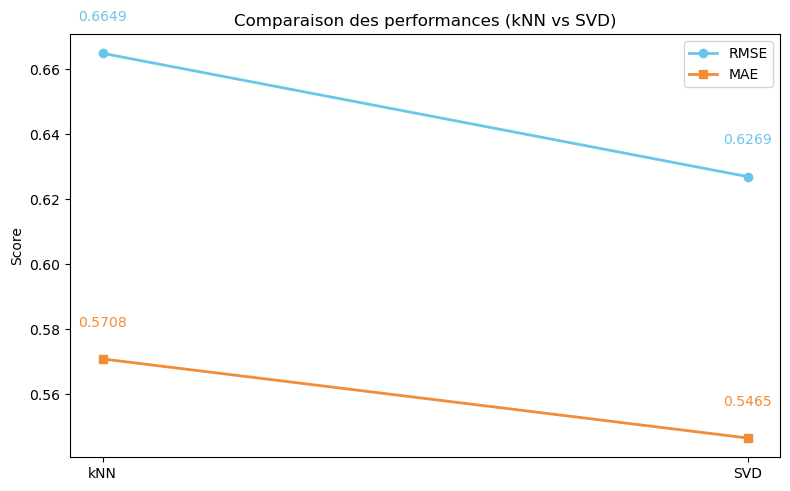

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Moyennes des métriques
models = ['kNN', 'SVD']
rmse_scores = [mean_rmse_knn,  mean_rmse_svd]
mae_scores = [mean_mae_knn, mean_mae_svd]

x = np.arange(len(models))  
plt.figure(figsize=(8, 5))

# Tracés des lignes
plt.plot(x, rmse_scores, marker='o', label='RMSE', color='#6AC6E8', linewidth=2)
plt.plot(x, mae_scores, marker='s', label='MAE', color='#F28C38', linewidth=2)

# Ajout des valeurs sur les points
for i in range(len(models)):
    plt.text(x[i], rmse_scores[i] + 0.01, f"{rmse_scores[i]:.4f}", ha='center', color='#6AC6E8')
    plt.text(x[i], mae_scores[i] + 0.01, f"{mae_scores[i]:.4f}", ha='center', color='#F28C38')

# Personnalisation
plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Comparaison des performances (kNN vs SVD)')
plt.legend()
plt.tight_layout()
plt.show()


Test de l'utilisation d'un modèle pour prédire les recomandations de mentors


Recommandations pour Parent_236:
- Mentor: Mentor_12, Score estimé: 4.03
- Mentor: Mentor_17, Score estimé: 3.80
- Mentor: Mentor_3, Score estimé: 3.78

Recommandations pour Parent_204:
- Mentor: Mentor_26, Score estimé: 4.07

Recommandations pour Parent_137:
- Mentor: Mentor_13, Score estimé: 3.96
- Mentor: Mentor_5, Score estimé: 3.93
- Mentor: Mentor_22, Score estimé: 3.77


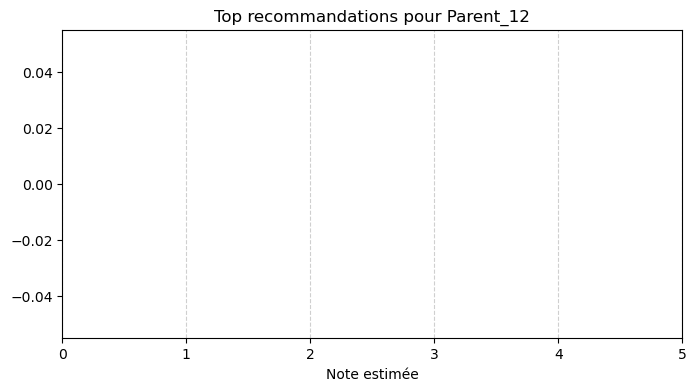

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def get_top_n(predictions, n=5):
    from collections import defaultdict
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Générer des recommandations pour chaque parent
top_n = get_top_n(svd_preds)

# Exemple de predictions pour les 3 premiers parents
for parent_id, recs in list(top_n.items())[:3]:  # Les 3 premiers parents
    print(f"\nRecommandations pour {parent_id}:")
    for mentor_id, score in recs:
        print(f"- Mentor: {mentor_id}, Score estimé: {score:.2f}")

# Exemple : recommandations pour Parent_12 avec le top_n calculé (via get_top_n)
parent_id = "Parent_12"
recommandations = top_n[parent_id]

# Transformation pour graphique
df_reco = pd.DataFrame(recommandations, columns=["mentor_id", "estimated_rating"])
df_reco = df_reco.sort_values(by="estimated_rating", ascending=True)

# Affichage en barres horizontales
plt.figure(figsize=(8, 4))
plt.barh(df_reco["mentor_id"], df_reco["estimated_rating"], color="#6AC6E8")
plt.xlabel("Note estimée")
plt.title(f"Top recommandations pour {parent_id}")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [11]:
#!python3 -m streamlit run app.py --server.headless true --server.port 8501

Recherche du meilleur poids pour le blending des deux modèls

In [12]:
from surprise import accuracy, Prediction

best_alpha = None
best_rmse = float('inf')

for alpha in [i / 10 for i in range(11)]:
    blended_preds = []
    for svd_p, knn_p in zip(svd_preds, knn_preds):
        uid, iid, true_r = svd_p.uid, svd_p.iid, svd_p.r_ui
        blended_est = alpha * svd_p.est + (1 - alpha) * knn_p.est
        blended_preds.append(Prediction(uid, iid, true_r, blended_est, {}))
    
    rmse = accuracy.rmse(blended_preds, verbose=False)
    print(f"Alpha={alpha:.1f} => RMSE={rmse:.4f}")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print(f"\n Meilleur alpha : {best_alpha} avec RMSE = {best_rmse:.4f}")


Alpha=0.0 => RMSE=0.6621
Alpha=0.1 => RMSE=0.6552
Alpha=0.2 => RMSE=0.6490
Alpha=0.3 => RMSE=0.6435
Alpha=0.4 => RMSE=0.6387
Alpha=0.5 => RMSE=0.6346
Alpha=0.6 => RMSE=0.6313
Alpha=0.7 => RMSE=0.6288
Alpha=0.8 => RMSE=0.6270
Alpha=0.9 => RMSE=0.6260
Alpha=1.0 => RMSE=0.6258

 Meilleur alpha : 1.0 avec RMSE = 0.6258


In [13]:
from surprise import accuracy

# Blending
best_alpha = 0.7  # poids SVD vs KNN

blended_preds = []
for svd_p, knn_p in zip(svd_preds, knn_preds):
    uid, iid, true_r = svd_p.uid, svd_p.iid, svd_p.r_ui
    svd_est, knn_est = svd_p.est, knn_p.est
    blended_est = alpha * svd_est + (1 - alpha) * knn_est
    blended_preds.append((uid, iid, true_r, blended_est, None))

# Calcul RMSE et MAE du blend
from surprise import Prediction
blended_predictions = [Prediction(uid, iid, true_r, est, details)
                       for uid, iid, true_r, est, details in blended_preds]

rmse_blend = accuracy.rmse(blended_predictions)
mae_blend = accuracy.mae(blended_predictions)

# Création du tableau
df_perf = pd.DataFrame({
    "Modèle": ["SVD", "kNN", f"Blend (α={best_alpha:.2f})"],
    "RMSE": [mean_rmse_knn, mean_rmse_svd, rmse_blend],
    "MAE": [mean_mae_knn, mean_mae_svd, mae_blend]
})
print(df_perf)


RMSE: 0.6258
MAE:  0.5475
           Modèle      RMSE       MAE
0             SVD  0.664891  0.570837
1             kNN  0.626928  0.546492
2  Blend (α=0.70)  0.625752  0.547476


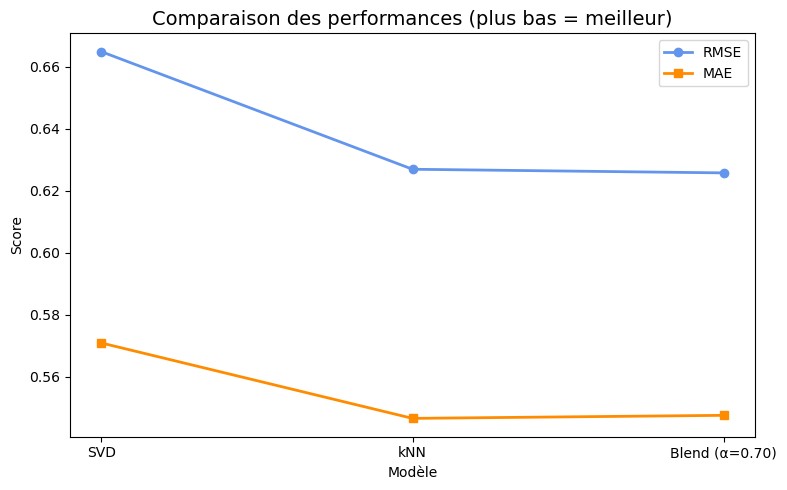

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(df_perf))

# Courbes
plt.plot(df_perf["Modèle"], df_perf["RMSE"], marker='o', label='RMSE', color='cornflowerblue', linewidth=2)
if df_perf["MAE"].notnull().all():
    plt.plot(df_perf["Modèle"], df_perf["MAE"], marker='s', label='MAE', color='darkorange', linewidth=2)

# Personnalisation
plt.title("Comparaison des performances (plus bas = meilleur)", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Modèle")
plt.legend()
plt.tight_layout()
plt.show()


Analyse comparative des modèles de recommandation

J'ai évalué trois approches différentes pour le système de recommandation : SVD, k plus proches voisins (kNN), et une combinaison pondérée des deux (Blend).



Ces résultats montrent que le modèle kNN est celui qui obtient les meilleures performances globales en termes d'erreur moyenne, légèrement devant le modèle blendé. Le SVD, bien que réputé performant, est ici légèrement moins précis.


Observation dans l'application

Lorsque j'intègre les modèles dans une application interactive fait qvec streamlit, on observe un comportement contrasté :

Le modèle SVD attribue systématiquement un score de 5.00, quelle que soit la sélection du parent, ce qui indique une sous-utilisation de l'information dans les données.


Le modèle kNN, en revanche, génère des scores plus variés et personnalisés, reflétant les préférences spécifiques de chaque parent.

Le Blend, avec un poids α = 0.70 pour le SVD, combine les deux approches et fournit des résultats plus nuancés, avec une meilleure cohérence dans les recommandations.

Interprétation

La nature très dense et uniforme de la matrice d'évaluation rend le SVD peu performant, car celui-ci tend à reconstruire la moyenne globale, perdant ainsi en personnalisation. Le kNN, fondé sur la proximité entre utilisateurs, parvient à mieux capturer les similarités locales et propose des scores différenciés. Le modèle blendé exploite le meilleur des deux mondes : la stabilité du SVD et la finesse du kNN, ce qui le rend idéal pour une mise en production.

Conclusion

Au vu des performances mesurées et des tests sur l'application, le modèle blendé s’avère être le plus adapté à notre système de recommandation de mentors. Il allie précision, robustesse, et pertinence des suggestions, justifiant son choix comme solution finale. La prochaine étape serait de tester ces modèles sur l'application du GPE